# Dimensionality Reduction


Dimensionality:      
number of columns we have in the dataset, assuming that we are working on a tidy dataset.      

When we have many columns in our dataset, (say more than 10), the data is considered high dimensional. If we are new to that dataset, it could be hard to find the most important patterns because of the complexity that comes with high-dimensionality. To overcome this, we can reduce the number of columns using dimensionality reduction techniques.     

These techniques can also be useful for relatively low dimensional datasets.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

If a column has very little variance, then perhaps we can drop the column. To get a quick overview of which columns contain little variance, we can use .describe(). By default, this method only act on numerical data, but we can use arg exclude="number" to get summary statistics adapted to non-numerical data.

In [9]:
df_pokemon = pd.read_csv("../Machine_Learning_basics/data/pokemon.csv",index_col = [0])
df_pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

# Leave this list as is for now
non_number_cols = ['Name', 'Type 1', 'Legendary']

# Sub-select by combining the lists with chosen features
df_selected = df_pokemon[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name Type 1  Legendary
#                                                              
1  45      49       49              Bulbasaur  Grass      False
2  60      62       63                Ivysaur  Grass      False
3  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False


In [12]:
df_selected.describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


In [13]:
df_selected.describe(exclude="number")

,Name,Type 1,Legendary
count,800,800,800
unique,800,18,2
top,Archen,Water,False
freq,1,112,735


## 1. Feature selection vs Feature extraction

Reducing the number of dimensions in our dataset has multiple benefits. The dataset will become simpler and thus easier to work with, require less disk space and faster computation. In addition, models are less likely to overfit on dataset with fewer dimension. The simplest way to reduce dimensionality is to only select th efeatures or columns that are important to us from a larger dataset.     

The hard part is to know which feature is important. If we are new to the dataset, we have to some EDA. e.g. pair plot from Seaborn can show if any data are perfectly correlated to each other, and if has, since they hold the same information, we can drop one of them. If there would have been a numeric feature without any variance in the dataset, we can drop them too.     

Feature selection:         
Drop the entire column (feature) and keep only the relevant ones.     

Feature extraction:     
Same goal of reducing dimensionality, but different approach. We will calculating or extracting new features from the original one. These new features have as little redundant information in them as possible and therefore fewer in number.     

One downside is that the newly created features are often less intuitive to understand than the original ones.

## 2. t-SNE visualisation of high-dimensional data

t-Distributed Stochastic Neighbor Embedding (t-SNE)       

t-SNE will maximise the distance in the 2 dimension.   

Before applying t-SNE, drop all non-numerical column as it does not work with non-numerical column.     

Using t-SNE from scikit-learn. High learning rate will cause the algorithm to be more adventurous in the configuration. Usually learning rate fall in the 10 to 1000 range.     

After we fit_transform, we can plot the data with hue=feature, to see if the dataset can be separated by the feature.

In [15]:
df_ansur_female = pd.read_csv("../Machine_Learning_basics/data/ANSUR_II_FEMALE.csv")
print(df_ansur_female.head())
print(df_ansur_female.shape)

                   Branch     Component  Gender  \
0          Combat Support  Regular Army  Female   
1  Combat Service Support  Regular Army  Female   
2  Combat Service Support  Regular Army  Female   
3  Combat Service Support  Regular Army  Female   
4             Combat Arms  Regular Army  Female   

   abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             231            1282                    301   
1                             194            1379                    320   
2                             183            1369                    329   
3                             261            1356                    306   
4                             309            1303                    308   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 204          1180                      222   
1                 207          1292                      225   
2                 233          1271         

In [18]:
#remove all non-numeirc col
non_numeric = ["BMI_class","Height_class","Gender","Component","Branch"]
df_ansur_female_numeric = df_ansur_female.drop(non_numeric,axis=1)
df_ansur_female_numeric.shape

(1986, 94)

In [19]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)
# fit and transform the TSNE model to our numierical dataset
# this project our high-dimension dataset onto a numpy array with 2 dimension
tsne_features = m.fit_transform(df_ansur_female_numeric)
#
tsne_features[1:4,:]


array([[-40.560696 ,  -0.6114784],
       [-29.482864 , -16.947702 ],
       [  1.360124 , -28.035597 ]], dtype=float32)

In [21]:
# assign back to original dataset
df_ansur_female["x"] = tsne_features[:,0]
df_ansur_female["y"] = tsne_features[:,1]

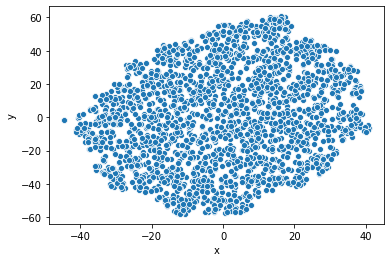

In [22]:
sns.scatterplot(x="x",y="y",data=df_ansur_female)
plt.show()
# one big cluster
# there are no distinct groups of female body shape with little in between
# there is a more continous distribution of body shapes, and thus one big cluster

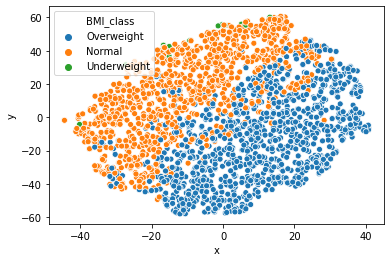

In [23]:
# using categorical data we excluded, we can reveal and hidden structure
sns.scatterplot(x="x",y="y",hue="BMI_class", data = df_ansur_female)
plt.show()
# from the 90+ features in the dataset, t-SNE picked up that weight explains alot of variance in the dataset
# and use that to spread out points alonf the xaxis.

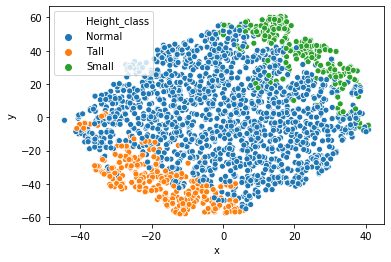

In [24]:
sns.scatterplot(x="x",y="y",hue="Height_class", data = df_ansur_female)
plt.show()

## 3. Dimensionality trade-off

We would rather have a dataset with alot of features compared to one with just a few.     
There is however 1 downside to high-dimensional datasets: models tend to overfit badly on high-dimensional data. The solution is to reduce dimensionality, but which feature to drop ?       

If we wish to add feature into dataset to increase accuracy, the number of observation should increase exponentially with the number of features to avoid overfitting.       

